# To Grant or Not to Grant: Deciding on Compensation Benefits 

### Machine Learning Group Project 2024/2025 - Group 52


__Members:__
- Diogo Rodrigues _(20240512@novaims.unl.pt)_
- Alexandre Gonçalves _(20240738@novaims.unl.pt)_
- Pedro Costa _(20222121@novaims.unl.pt)_
- Santiago Taylor _(20240542@novaims.unl.pt)_
- Lena Hermann _(20241446@novaims.unl.pt)_



| **ATTRIBUTE**                        | **DESCRIPTION**                                                                                                         |
|--------------------------------------|-------------------------------------------------------------------------------------------------------------------------|
| Accident Date                        | Injury date of the claim.                                                                                               |
| Age at Injury                        | Age of injured worker when the injury occurred.                                                                         |
| Alternative Dispute Resolution       | Adjudication processes external to the Board.                                                                           |
| Assembly Date                        | The date the claim was first assembled.                                                                                 |
| Attorney/Representative              | Is the claim being represented by an Attorney?                                                                          |
| Average Weekly Wage                  | The wage used to calculate workers’ compensation, disability, or Paid Leave wage replacement benefits.                  |
| Birth Year                           | The reported year of birth of the injured worker.                                                                       |
| C-2 Date                             | Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).              |
| C-3 Date                             | Date Form C-3 (Employee Claim Form) was received.                                                                       |
| Carrier Name                         | Name of primary insurance provider responsible for providing workers’ compensation coverage to the injured worker's employer. |
| Carrier Type                         | Type of primary insurance provider responsible for providing workers’ compensation coverage.                            |
| Claim Identifier                     | Unique identifier for each claim, assigned by WCB.                                                                      |
| County of Injury                     | Name of the New York County where the injury occurred.                                                                  |
| COVID-19 Indicator                   | Indication that the claim may be associated with COVID-19.                                                              |
| District Name                        | Name of the WCB district office that oversees claims for that region or area of the state.                              |
| First Hearing Date                   | Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing held. |
| Gender                               | The reported gender of the injured worker.                                                                              |
| IME-4 Count                          | Number of IME-4 forms received per claim. The IME-4 form is the “Independent Examiner’s Report of Independent Medical Examination” form. |
| Industry Code                        | NAICS code and descriptions are available at https://www.naics.com/search-naics-codes-by-industry/.                     |
| Industry Code Description            | 2-digit NAICS industry code description used to classify businesses according to their economic activity.               |
| Medical Fee Region                   | Approximate region where the injured worker would receive medical service.                                               |
| OIICS Nature of Injury Description   | The OIICS nature of injury codes & descriptions are available at https://www.bls.gov/iif/oiics_manual_2007.pdf.         |
| WCIO Cause of Injury Code            | The WCIO cause of injury codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf.  |
| WCIO Cause of Injury Description     | See description of field above.                                                                                         |
| WCIO Nature of Injury Code           | The WCIO nature of injury are available at https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf.                     |
| WCIO Nature of Injury Description    | See description of field above.                                                                                         |
| WCIO Part Of Body Code               | The WCIO part of body codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf.      |
| WCIO Part Of Body Description        | See description of field above.                                                                                         |
| Zip Code                             | The reported ZIP code of the injured worker’s home address.                                                             |
| Agreement Reached                    | Binary variable: Yes if there is an agreement without the involvement of the WCB -> unknown at the start of a claim.    |
| WCB Decision                         | Multiclass variable: Decision of the WCB relative to the claim: “Accident” means that claim refers to workplace accident, “Occupational Disease” means illness from the workplace. -> requires WCB deliberation so it is unknown at start of claim. |
| Claim Injury Type                    | Main target variable: Deliberation of the WCB relative to benefits awarded to the claim. Numbering indicates severity.   |


## 1. Set-Up and Data Loading <a id='dataload'></a>
[to the top](#top)

### 1.1 Import the Needed Libraries <a id='import_libaries'></a>

In [1]:
import numpy as np #to efficiently compute functions
import pandas as pd #to work with data frames
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import zipfile #to open zipfile
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 60)
import warnings
warnings.filterwarnings('ignore')

### 1.2 Read the Data and First Overview <a id='read_data'></a>
[to the top](#top)

In [2]:
train_zip_path = 'train_data.csv.zip'
test_zip_path = 'test_data.csv.zip'

# open csv file from zip
def read_zipped_csv(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as z:
        csv_filename = z.namelist()[0]
        
        with z.open(csv_filename) as f:
            return pd.read_csv(f)

train_df = read_zipped_csv(train_zip_path)
test_df = read_zipped_csv(test_zip_path)

In [3]:
train_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [4]:
test_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,6165911,BRONX,N,NYC,NaN,M,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,1A. PRIVATE,6166141,QUEENS,N,NYC,NaN,F,NaN,45.0,RETAIL TRADE,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
2,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,1A. PRIVATE,6165907,WESTCHESTER,N,NYC,NaN,F,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0
3,2022-12-28,55,N,2023-01-02,N,0.0,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,6166047,QUEENS,N,NYC,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6
4,2022-12-20,25,N,2023-01-02,N,0.0,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,6166102,KINGS,N,NYC,NaN,M,NaN,55.0,MANAGEMENT OF COMPANIES AND ENTERPRISES,IV,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5


## 2. Data Understanding and Exploration <a id='dataunderstand'></a>
[to the top](#top)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [6]:
# Have a first look at the numerical variables and their distirbutions
train_df.describe()

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,574026.000000,5.453750e+05,544948.000000,5.934710e+05,132803.000000,564068.000000,0.0,558386.000000,558369.000000,556944.000000,574026.000000,574026.000000
mean,42.114270,4.910883e+02,1886.767604,2.366760e+07,3.207337,58.645305,NaN,54.381143,41.013839,39.738146,0.046665,3.006559
std,14.256432,6.092918e+03,414.644423,1.079271e+08,2.832303,19.644175,NaN,25.874281,22.207521,22.365940,0.210921,2.000801
min,0.000000,0.000000e+00,0.000000,5.393066e+06,1.000000,11.000000,NaN,1.000000,1.000000,-9.000000,0.000000,0.000000
25%,31.000000,0.000000e+00,1965.000000,5.593414e+06,1.000000,45.000000,NaN,31.000000,16.000000,33.000000,0.000000,1.000000
50%,42.000000,0.000000e+00,1977.000000,5.791212e+06,2.000000,61.000000,NaN,56.000000,49.000000,38.000000,0.000000,3.000000
75%,54.000000,8.410000e+02,1989.000000,5.991000e+06,4.000000,71.000000,NaN,75.000000,52.000000,53.000000,0.000000,5.000000
max,117.000000,2.828079e+06,2018.000000,9.998917e+08,73.000000,92.000000,NaN,99.000000,91.000000,99.000000,1.000000,6.000000


In [7]:
# Have a first look at the categorical variables and their distirbutions
train_df.describe(include='O')

,Accident Date,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Description,WCIO Nature of Injury Description,WCIO Part Of Body Description,Zip Code,WCB Decision
count,570337,574026,593471,574026,559466,187245,574026,574026,574026,574026,574026,574026,150798,574026,564068,574026,558386,558369,556944,545389,574026
unique,5539,3,1096,2,2475,1648,2046,8,8,63,2,8,1094,4,20,5,74,56,54,10060,1
top,2020-03-01,N,2020-03-06,N,2021-05-11,2021-04-21,STATE INSURANCE FUND,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,NYC,2022-04-15,M,HEALTH CARE AND SOCIAL ASSISTANCE,IV,LIFTING,STRAIN OR TEAR,LOWER BACK AREA,11236,Not Work Related
freq,1245,571412,1422,392291,1847,350,111144,285368,291078,60430,546505,270779,440,335218,114339,265981,46610,153373,51862,3302,574026


In [8]:
# before working on the dataset, we will do a copy so we can use the original one if we need it
train_df_temp = train_df.copy()

## Variances

In [9]:
numerical_cols = train_df.select_dtypes(include=['number']).columns
variances = train_df[numerical_cols].var()
print(variances)

Age at Injury                         2.032459e+02
Average Weekly Wage                   3.712365e+07
Birth Year                            1.719300e+05
Claim Identifier                      1.164827e+16
IME-4 Count                           8.021942e+00
Industry Code                         3.858936e+02
OIICS Nature of Injury Description             NaN
WCIO Cause of Injury Code             6.694784e+02
WCIO Nature of Injury Code            4.931740e+02
WCIO Part Of Body Code                5.002353e+02
Agreement Reached                     4.448758e-02
Number of Dependents                  4.003206e+00
dtype: float64


### 2.1 __Target Variable__ Analysis <a id='target'></a>
[to the top](#top)

We just have a look at the distribution of the target variable 'Claim Injury Type'. To check how our dataset is balanced.

In [10]:
train_df_temp['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

In [11]:
non_comp_percent = round(train_df_temp['Claim Injury Type'].value_counts().max() / len(train_df_temp),4)

print('Percentage of Non-Comp Cases: {}%'.format(non_comp_percent*100))

Percentage of Non-Comp Cases: 49.05%


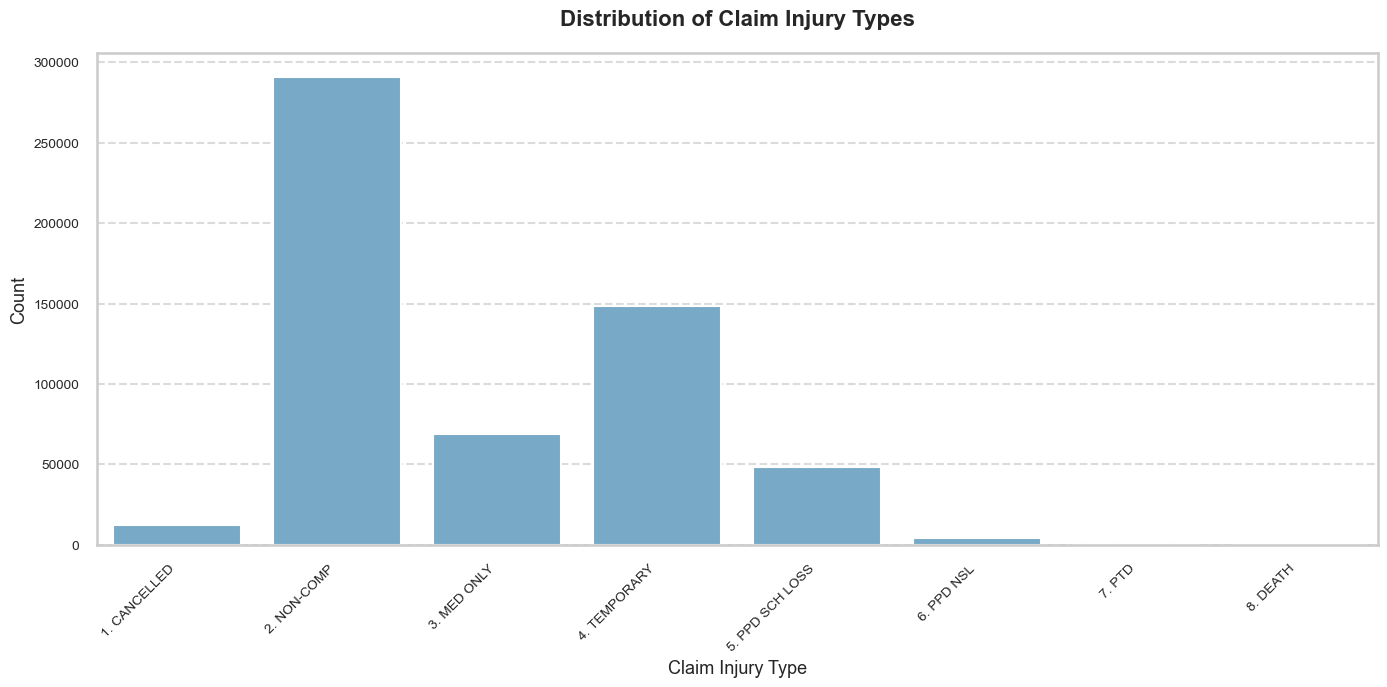

In [12]:
#Define the custom order for 'Claim Injury Type'
custom_order = ['1. CANCELLED', '2. NON-COMP', '3. MED ONLY', '4. TEMPORARY',
                '5. PPD SCH LOSS', '6. PPD NSL', '7. PTD', '8. DEATH']

#Plot distribution of target values with the custom order
target_values = train_df_temp['Claim Injury Type'].value_counts()

# Convert target values to a DataFrame and reorder based on custom order
df_target_counts = target_values.reset_index()
df_target_counts.columns = ['Claim Injury Type', 'Count']
df_target_counts = df_target_counts.set_index('Claim Injury Type').reindex(custom_order).reset_index()

plt.rcdefaults()
sns.set_style("whitegrid")  # Add gridlines to the background
sns.set_context("talk", font_scale=0.6)  # Increase font size for readability

#Create a figure with custom size
plt.figure(figsize=(14, 7))

#Use a single uniform color for all bars
uniform_color = sns.color_palette("Blues", 1)[0]  # Select a single shade of blue

#Create the barplot
barplot = sns.barplot(
    x='Claim Injury Type', 
    y='Count', 
    data=df_target_counts, 
    color=uniform_color,  # Apply the uniform color
    order=custom_order
)

#Add plot title and axis labels
plt.title('Distribution of Claim Injury Types', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Claim Injury Type', fontsize=13)
plt.ylabel('Count', fontsize=13)

#Improve x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate for better readability

#Add a grid to the background
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add dashed gridlines for the y-axis

# Adjust layout for clean spacing
plt.tight_layout()

# Show the plot
plt.show()

We can see that we have 7 different classes. One class, "NON-COMP", is very dominantly present with making up for 49.05% of the cases.

Let's have an initial look at the spearman correlation of the target variable with the other features: 

We use spearman correlation because we suspect that the relationship between our variables and target is non-linear, and also because our data contains outliers that can distort the analysis. Also, our data violate the assumptions of linearity and don't follow a normal distribtuion so spearman correlation is more adequate here. Also, despite the fact that our data is not ordinal we decide it to visualize its distribution in an ordinal way because we know that from 1 to 8 , it's the scale of the severity of the injury , and thus the compensations are ordered in severity order.

Spearman Correlations with 'Claim Injury Type Numeric':
Claim Injury Type Numeric             1.000000
Average Weekly Wage                   0.855234
Agreement Reached                     0.235905
Age at Injury                         0.118533
Industry Code                         0.028782
WCIO Nature of Injury Code            0.023586
WCIO Part Of Body Code                0.000096
Number of Dependents                 -0.000625
IME-4 Count                          -0.007009
WCIO Cause of Injury Code            -0.039392
Claim Identifier                     -0.154982
OIICS Nature of Injury Description         NaN
Name: Claim Injury Type Numeric, dtype: float64


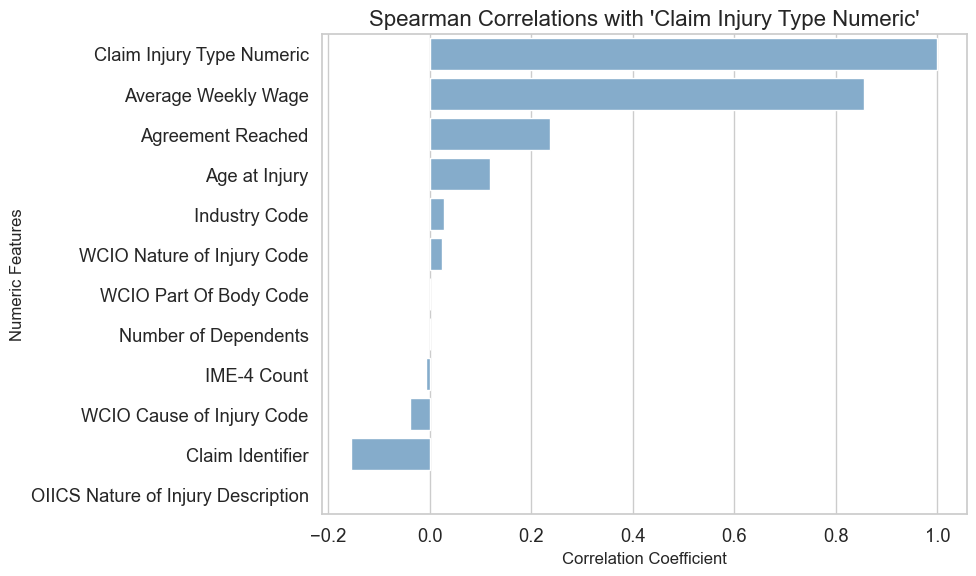

In [40]:
# Convert 'Claim Injury Type' to numeric if not already done
train_df_temp['Claim Injury Type Numeric'] = train_df_temp['Claim Injury Type'].astype('category').cat.codes

# Select only numeric columns
numeric_cols = train_df_temp.select_dtypes(include=[np.number])

# Calculate the Spearman correlation matrix
spearman_corr = numeric_cols.corr(method='spearman')

# Display correlations with the target variable 'Claim Injury Type Numeric'
target_correlations = spearman_corr['Claim Injury Type Numeric'].sort_values(ascending=False)

# Print the correlations
print("Spearman Correlations with 'Claim Injury Type Numeric':")
print(target_correlations)

# Plot the correlations as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=target_correlations.values, y=target_correlations.index, color="#7aaed6")

plt.title("Spearman Correlations with 'Claim Injury Type Numeric'", fontsize=16)
plt.xlabel("Correlation Coefficient", fontsize=12)
plt.ylabel("Numeric Features", fontsize=12)
plt.tight_layout()

plt.show()

1. Strongest correlations: 

Average Weekly Wage has the highest positive correlation with the target (0.855), suggesting that there may be a strong monotonic relationship between the weekly wage and the type of claim injury.

2. Moderate Correlations:

Agreement Reached shows a moderate positive correlation (0.236), indicating that cases where an agreement was reached may be related to specific types of claim injuries.

Age at Injury has a weaker positive correlation (0.119), implying a slight relationship between age and the type of claim injury.

3. Minimal correlations:

Industry Code, WCIO Nature of Injury Code, WCIO Part Of Body Code, and Number of Dependents , Claim Identifier and Birth Year , WCIO Cause of Injury Code

So lets have a look at the features itself.

__Age at Injury__

In [14]:
train_df_temp['Age at Injury'].describe()

count    574026.000000
mean         42.114270
std          14.256432
min           0.000000
25%          31.000000
50%          42.000000
75%          54.000000
max         117.000000
Name: Age at Injury, dtype: float64

We can already see that the minimum and maximum values seem kind of strang with ranging from 0 to 117. We will deal with them in the outlier section.

In [15]:
# plot the distribution of a single feature with respect to the target categorical variable.
def feature_distribution(data, feature, target_variable):
    plt.figure(figsize=(13, 8))
    sns.histplot(data=data, x=feature, hue=target_variable, multiple="stack")
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


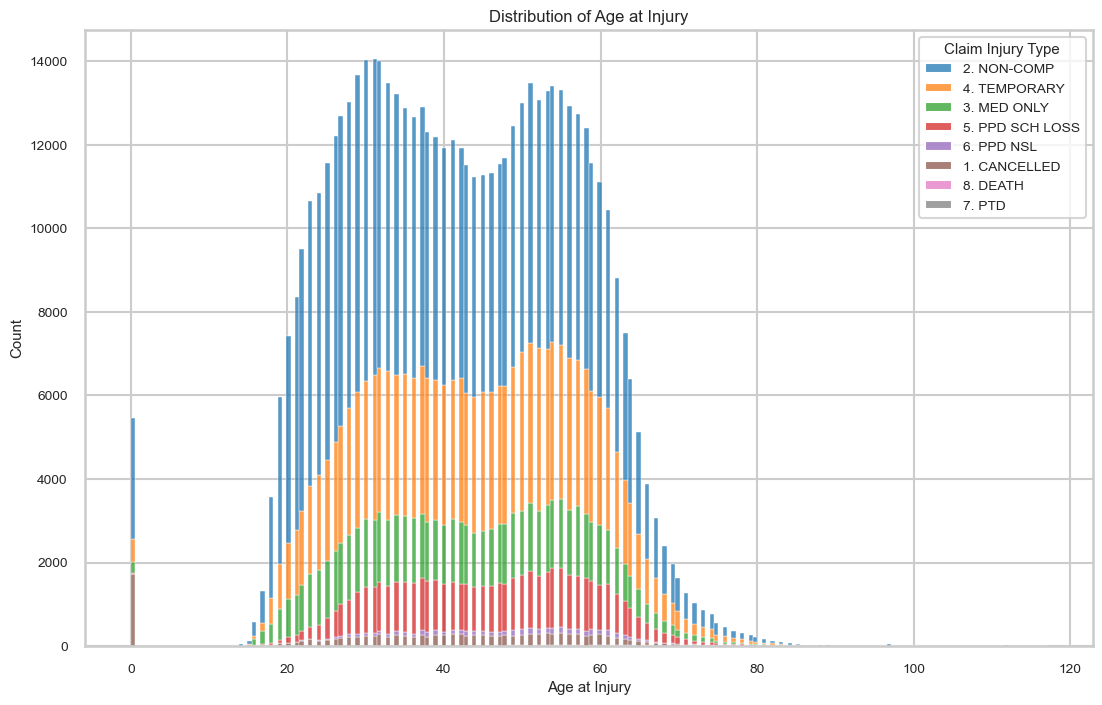

In [16]:
feature_distribution(train_df_temp, 'Age at Injury', 'Claim Injury Type')

Some conclusions on the distribution of the claim injury type related to the age can already be seen:

1. The 2. NON-COMP claim type is the most prevalent across all age groups, indicating that non-compensable cases are frequent regardless of age

2. The distribution is most concentrated between the ages of approximately 20 and 60, suggesting that most injury claims occur within the working-age population.

3. The number of claims decreases significantly for ages above 60 and below 20, indicating fewer injury claims for younger and older individuals

4. The 8. DEATH and 7. PTD (permanent total disability) claim types appear infrequently, showing they are relatively rare outcomes.

5. There is a noticeable spike in 2. NON-COMP claims for very young ages (below 20), which might indicate special cases, data anomalies, or claims related to youth employment or specific circumstances.


### 2.2 Data __Anomalies__ and __Inconsistencies__ <a id='anomalies'></a>
[to the top](#top)

Missing values analysis

In [17]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values = missing_values_table(train_df_temp)

Your selected dataframe has 34 columns.
There are 31 columns that have missing values.


In [18]:
missing_values.head(15)

,Missing Values,% of Total Values
OIICS Nature of Injury Description,593471,100.0
IME-4 Count,460668,77.6
First Hearing Date,442673,74.6
C-3 Date,406226,68.4
Birth Year,48523,8.2
Average Weekly Wage,48096,8.1
Zip Code,48082,8.1
WCIO Part Of Body Description,36527,6.2
WCIO Part Of Body Code,36527,6.2
WCIO Nature of Injury Description,35102,5.9


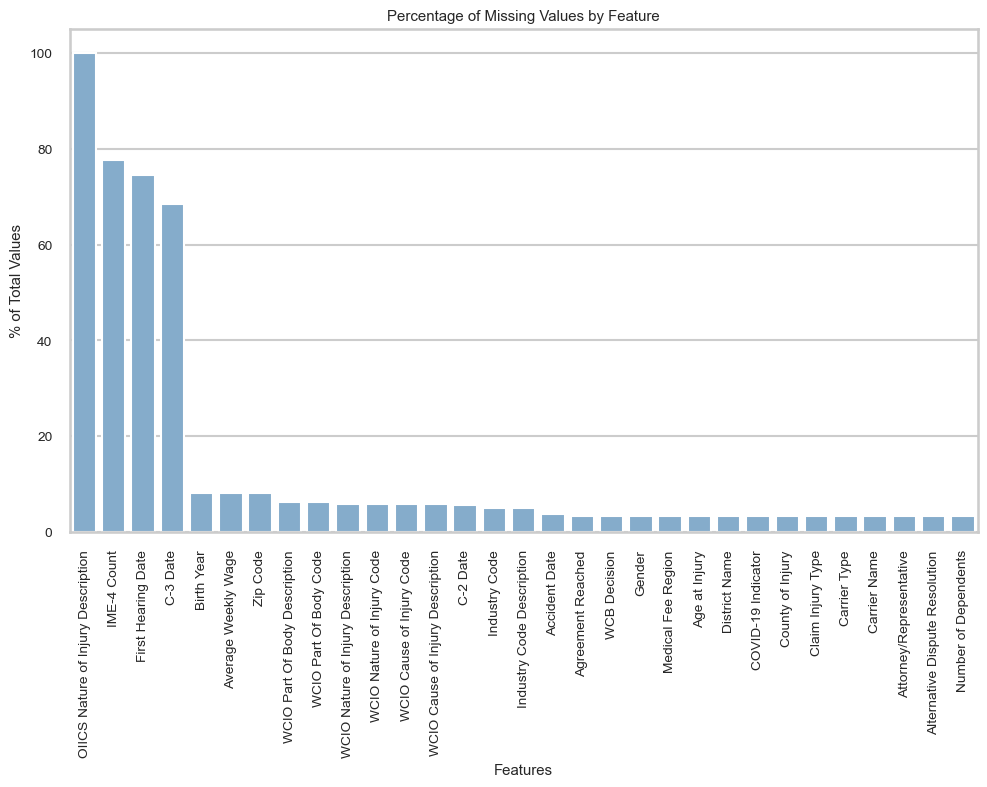

In [19]:
def plot_missing_values(mis_val_table, title):
    plt.figure(figsize=(10, 8))
    
    # Create a bar plot for the percentage of missing values
    sns.set_style("whitegrid")  # Add gridlines to the background
    sns.barplot(x=mis_val_table.index, 
                y=mis_val_table['% of Total Values'],
               color="#7aaed6")
    
    # Rotate the x labels for better readability
    plt.xticks(rotation=90)
    
    # Set plot labels and title
    plt.title(title)
    plt.xlabel('Features')
    plt.ylabel('% of Total Values')
    
    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the function to plot the missing values
plot_missing_values(missing_values,title= 'Percentage of Missing Values by Feature')

These colums are the ones that have lots of missing values so we'll have to address them in the later section of pre-processing and data cleaning.

* OIICS Nature of Injury Description:		100.0 % 

* IME-4 Count:		77.6%

* First Hearing Date:	74.6%

* C-3 Date:		68.4% 

Null values analysis

In [20]:
# Function to calculate zero values by column
def zero_values_table(df):
    # Total zero values
    zero_val = (df == 0).sum()
    
    # Percentage of zero values
    zero_val_percent = 100 * (df == 0).sum() / len(df)
    
    # Make a table with the results
    zero_val_table = pd.concat([zero_val, zero_val_percent], axis=1)
    
    # Rename the columns
    zero_val_table_ren_columns = zero_val_table.rename(
        columns={0: 'Zero Values', 1: '% of Total Values'})
    
    # Sort the table by percentage of zero values in descending order
    zero_val_table_ren_columns = zero_val_table_ren_columns[
        zero_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    
    # Print summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
          "There are " + str(zero_val_table_ren_columns.shape[0]) +
          " columns that have zero values.")
    
    # Return the dataframe with zero values information
    return zero_val_table_ren_columns


zero_values = zero_values_table(train_df_temp)

Your selected dataframe has 34 columns.
There are 6 columns that have zero values.


In [21]:
zero_values.head(15)

# The column Agreement Date has a high percentage of zero values because it's a binary feature and thus being equal to 0 means no Agreement Reached.

,Zero Values,% of Total Values
Agreement Reached,547239,92.2
Average Weekly Wage,335450,56.5
Number of Dependents,81665,13.8
Birth Year,25081,4.2
Claim Injury Type Numeric,12477,2.1
Age at Injury,5464,0.9


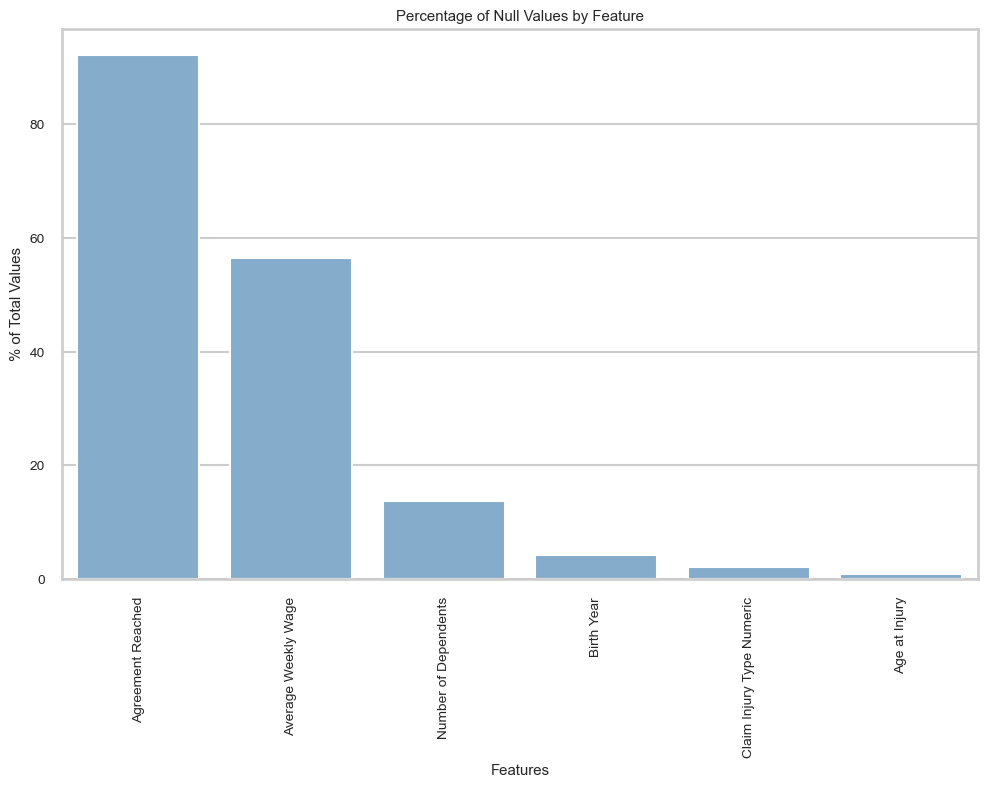

In [22]:
plot_missing_values(zero_values,title='Percentage of Null Values by Feature')

These colums are the ones that have lots of null values so we'll have to address them in the later section of pre-processing and data cleaning.

* (The column Agreement Date has a high percentage of zero values because it's a binary feature and thus being equal to 0 means no Agreement Reached)

* Average Weekly Wage:	56.5 % 

* Number of Dependents:	13.8% 

Individual Feature Analysis

In [23]:
# First, split the features into numerical and categorical

# Select numerical columns
numerical_cols = train_df_temp.select_dtypes(include=[np.number])

# Select categorical columns
categorical_cols = train_df_temp.select_dtypes(include=[object])

In [24]:
def numerical_describe(df, numerical_col):
    # Check if the column in the DataFrame is numerical
    if np.issubdtype(df[numerical_col].dtype, np.number):
        return df[numerical_col].describe()
    else:
        return None

# Iterate over the list of numerical columns
for col in numerical_cols:
    print(f"Description for column {col}:\n")
    description = numerical_describe(train_df_temp, col)
    if description is not None:
        print(description)
    else:
        print(f"Column {col} is not numerical.\n")

Description for column Age at Injury:

count    574026.000000
mean         42.114270
std          14.256432
min           0.000000
25%          31.000000
50%          42.000000
75%          54.000000
max         117.000000
Name: Age at Injury, dtype: float64
Description for column Average Weekly Wage:

count    5.453750e+05
mean     4.910883e+02
std      6.092918e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.410000e+02
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64
Description for column Birth Year:

count    544948.000000
mean       1886.767604
std         414.644423
min           0.000000
25%        1965.000000
50%        1977.000000
75%        1989.000000
max        2018.000000
Name: Birth Year, dtype: float64
Description for column Claim Identifier:

count    5.934710e+05
mean     2.366760e+07
std      1.079271e+08
min      5.393066e+06
25%      5.593414e+06
50%      5.791212e+06
75%      5.991000e+06
max      9.998917e+08
Name: C

### Summary from Individual Feature Analysis:

#### Key Points:

- **Age at Injury**: Min = 0 (missing/incorrect data), Max = 117 (possible outlier).
- **Average Weekly Wage**: Min = 0 (unreported/missing), Max = 2,828,079 (extreme outlier; 75th percentile = 841).
- **Birth Year**: Min = 0 (erroneous), Max = 2018 (unrealistic), Mean = 1886.77 (outliers likely).
- **Claim Identifier**: High variability, broad range, potentially expected as an identifier.
- **IME-4 Count**: Max = 73, indicating outliers beyond the 75th percentile of 4.
- **OIICS Nature of Injury**: Missing entirely; may need imputation/removal.
- **WCIO Part Of Body Code**: Min = -9 (data error).
- **Agreement Reached**: Mean = 4.67% of cases; shows class imbalance.
- **Number of Dependents**: Max = 6 (reasonable, needs context verification).
- **Claim Injury Type Numeric**: Min = -1 (error), 75th percentile = 3, Max = 7 (varied types, needs review).








In [25]:
def categorical_describe(df, categorical_col):
    # Check if the column in the DataFrame is categorical
    if df[categorical_col].dtype == 'object' or df[categorical_col].dtype.name == 'category':
        description = df[categorical_col].describe()
        return description
    else:
        return None

# Iterate over the list of categorical columns
for col in categorical_cols:
    print(f"Description for column {col}:\n")
    description = categorical_describe(train_df_temp, col)
    if description is not None:
        print(description)
    else:
        print(f"Column {col} is not categorical.\n")

Description for column Accident Date:

count         570337
unique          5539
top       2020-03-01
freq            1245
Name: Accident Date, dtype: object
Description for column Alternative Dispute Resolution:

count     574026
unique         3
top            N
freq      571412
Name: Alternative Dispute Resolution, dtype: object
Description for column Assembly Date:

count         593471
unique          1096
top       2020-03-06
freq            1422
Name: Assembly Date, dtype: object
Description for column Attorney/Representative:

count     574026
unique         2
top            N
freq      392291
Name: Attorney/Representative, dtype: object
Description for column C-2 Date:

count         559466
unique          2475
top       2021-05-11
freq            1847
Name: C-2 Date, dtype: object
Description for column C-3 Date:

count         187245
unique          1648
top       2021-04-21
freq             350
Name: C-3 Date, dtype: object
Description for column Carrier Name:

count       

### Summary from Individual Categorical Feature Analysis:

#### Key Points from Categorical Analysis:

- **Accident Date**: High count (570,337) and variety (5,539 unique dates), with the most frequent date being 2020-03-01 (1,245 times).

- **Alternative Dispute Resolution**: Predominantly 'N' (571,412 out of 574,026), indicating limited use of this option.

- **Assembly Date**: Complete data (593,471), with 1,096 unique dates. Most frequent date: 2020-03-06 (1,422 times).

- **Attorney/Representative**: Majority response is 'N' (392,291 out of 574,026), showing fewer cases with attorney involvement.

- **C-2 Date**: Well-populated (559,466) with 2,475 unique values. Top date: 2021-05-11 (1,847 times).

- **C-3 Date**: Lower count (187,245), indicating many missing values. Top date: 2021-04-21 (350 times).

- **Carrier Name**: Complete data (574,026) with high diversity (2,046 unique). Most frequent: STATE INSURANCE FUND (111,144 times).

- **Carrier Type**: Predominantly '1A. PRIVATE' (285,368 out of 574,026).

- **Claim Injury Type**: Common type is '2. NON-COMP' (291,078 times).

- **County of Injury**: Widely varied (63 unique), with Suffolk being the most common (60,430 times).

- **COVID-19 Indicator**: Predominantly 'N' (546,505 out of 574,026).

- **District Name**: Most cases handled in NYC (270,779 times).

- **First Hearing Date**: Lower count (150,798) with varied dates. Top date: 2022-04-15 (440 times).

- **Gender**: Majority male (335,218 out of 574,026).

- **Industry Code Description**: Common in 'HEALTH CARE AND SOCIAL ASSISTANCE' (114,339 times).

- **Medical Fee Region**: Dominated by Region IV (265,981 times).

- **WCIO Cause of Injury Description**: Most common cause: 'LIFTING' (46,610 times).

- **WCIO Nature of Injury Description**: Predominantly 'STRAIN OR TEAR' (153,373 times).

- **WCIO Part Of Body Description**: Most common part affected is 'LOWER BACK AREA' (51,862 times).

- **Zip Code**: High diversity (10,060 unique). Most frequent: 11236 (3,302 times).

- **WCB Decision**: Uniform value ('Not Work Related') across all records (574,026 times).


#### Visual Data Analysis for Numerical Features after describing them

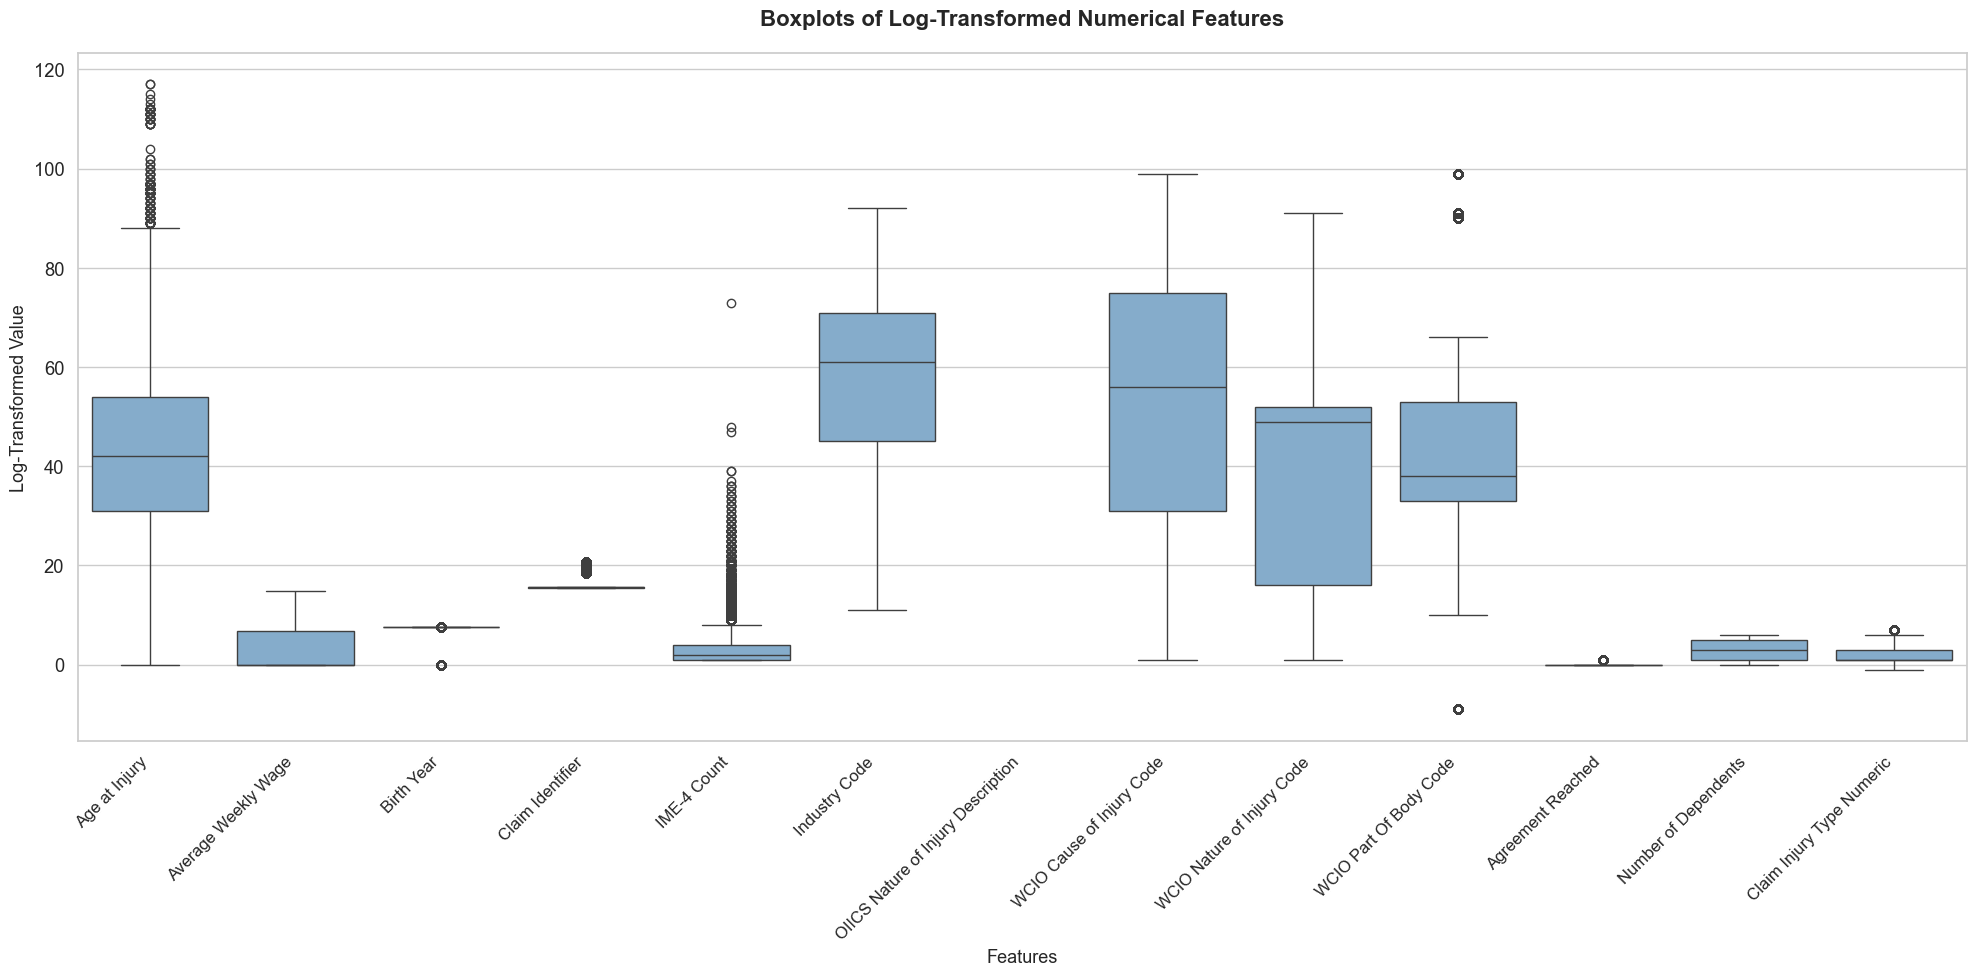

In [26]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

numeric_cols_log = numeric_cols.copy()
for col in numeric_cols_log.columns:
    if numeric_cols_log[col].max() > 1000:
        numeric_cols_log[col] = np.log1p(numeric_cols_log[col])

plt.figure(figsize=(20, 10))
sns.boxplot(data=numeric_cols_log, color='#7aaed6')


plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Boxplots of Log-Transformed Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=13)
plt.ylabel('Log-Transformed Value', fontsize=13)

plt.tight_layout()

plt.show()


### Observations from Boxplots of Log-Transformed Numerical Features:

1. **Age at Injury**:
   - Wide spread with outliers extending past 100, indicating variability in the data and potential outliers at older ages.

2. **Average Weekly Wage**:
   - Compact distribution with some outliers. Also, > 50% of the values are 0 so we'll have to take that into account


3. **Birth Year**:
   - Narrow range with a few outliers, which could indicate data entry errors or edge cases (e.g., very low or high years).

4. **Claim Identifier**:
   - Tight distribution, suggesting it is likely an ID rather than a useful variable for analysis. Outliers could represent different data entry segments.

5. **IME-4 Count**:
   - Many outliers present, indicating that while most counts are low, there are some significantly higher values.

6. **Industry Code**:
   - Relatively even distribution with few outliers, suggesting a spread across different codes.

7. **WCIO Codes (Cause, Nature, Part of Body)**:
   - Moderate spread with some outliers, indicating variability in reported injury data.

8. **Agreement Reached**:
   - Minimal spread, confirming that it is a binary var. or, with only a few outliers.

9. **Number of Dependents**:
   - Narrow range with a few outliers, indicating most values cluster tightly with some higher counts.

10. **Claim Injury Type Numeric (Target Var.)**:
    - Tight distribution with a few outliers, indicating that most data points fall within a small range but some deviations exist.
    - Given the class distribution analysis shown in the bar chart, it's clear that most instances are concentrated in a few categories, which aligns with the narrow spread observed in the boxplot.
    - The presence of outliers could represent rarer claim types, which may be difficult for models to predict due to limited examples in these categories.


#### Individual Analysis in Numerical Features

__Birth Year__

This variable results from accident date and age at accident. Therefore, we do not need it as it does not add any new information.

In [27]:
train_df_temp = train_df_temp.drop(columns='Birth Year')

In [28]:
test_df = test_df.drop(columns='Birth Year')

Analysis in the numerical variables that left (Age at Injury, Avg. Weekly Wage, Claim identifier, IME-4 Count, Nr. of Dependents)

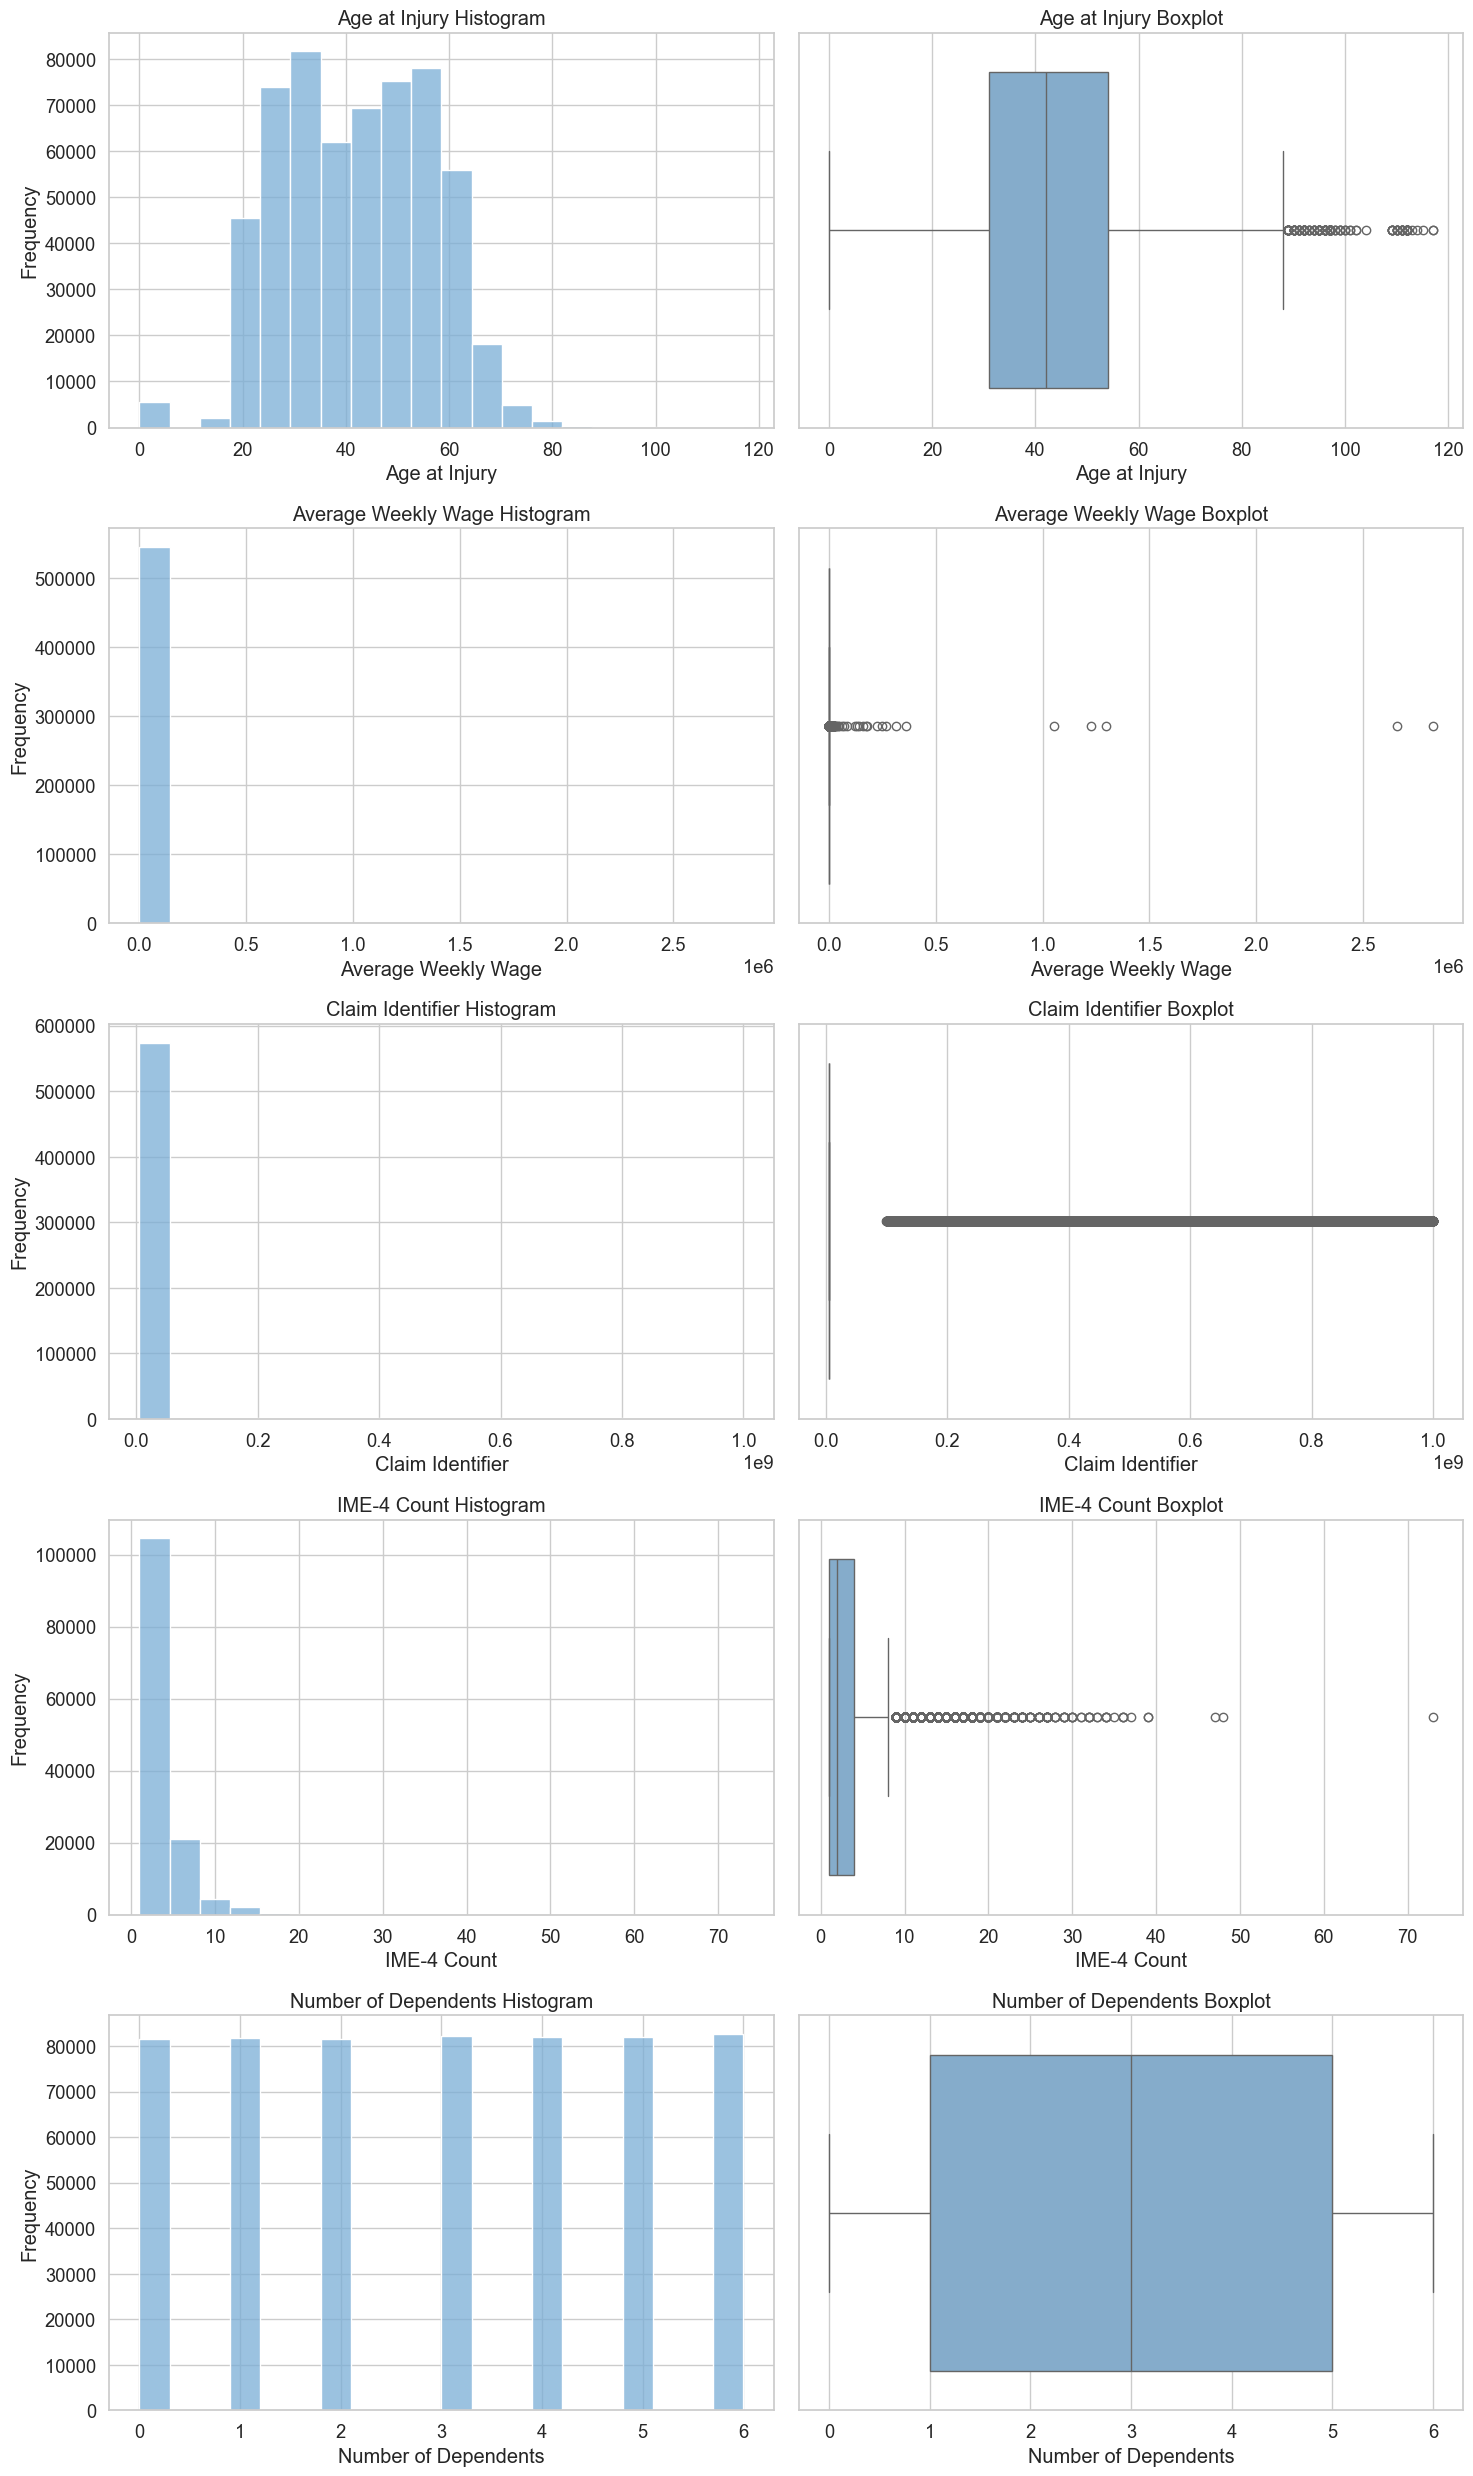

In [29]:
subset_numerical = train_df_temp[['Age at Injury', 'Average Weekly Wage', 
       'Claim Identifier', 'IME-4 Count',
       'Number of Dependents']].select_dtypes(include=[np.number])

# Create subplots for each numerical variable
n_vars = len(subset_numerical.columns)
fig, axes = plt.subplots(n_vars, 2, figsize=(15, 5*n_vars))
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Create histogram and boxplot for each variable
for i, col in enumerate(subset_numerical.columns):
    # Histogram
    sns.histplot(data=train_df_temp, x=col, bins=20, kde=False, ax=axes[i,0],color="#7aaed6")
    axes[i,0].set_title(f'{col} Histogram')
    axes[i,0].set_xlabel(col)
    axes[i,0].set_ylabel('Frequency')
    
    # Boxplot
    sns.boxplot(data=train_df_temp, x=col, ax=axes[i,1],color="#7aaed6")
    axes[i,1].set_title(f'{col} Boxplot')
    axes[i,1].set_xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()


1. **Age at Injury**:
   - **Histogram**: The distribution shows that most cases are clustered around ages 20–50, indicating that the majority of injuries occur in working-age adults.
   - **Boxplot**: There are some outliers above 60, suggesting that injuries among older individuals are less common but do occur.

2. **Average Weekly Wage**:
   - **Histogram**: The distribution appears highly skewed, with most data points concentrated at lower values, potentially indicating the prevalence of lower wage cases.
   - **Boxplot**: A significant number of extreme outliers, suggesting that while most wages are on the lower end, there are occasional cases with exceptionally high wages.

3. **Claim Identifier**:
   - **Histogram and Boxplot**: The distribution is highly uniform with minimal spread, indicating that this may be more of an identifier variable rather than an analytically meaningful one, so perhaps
   this variable can be droped or used as an index for each claim.

4. **IME-4 Count**:
   - **Histogram**: Shows that most cases have an IME-4 count of 0-5, with very few going beyond this range.
   - **Boxplot**: Highlights the presence of outliers, indicating that some claims have a notably higher number of IME-4 counts.

5. **Number of Dependents**:
   - **Histogram**: The distribution is fairly uniform, suggesting that the number of dependents varies widely without a clear trend.
   - **Boxplot**: A wider interquartile range indicates variability, with no significant outliers.

#### Visual Data Analysis for Categorical Features after describing them

In [30]:
categorical_cols.columns

Index(['Accident Date', 'Alternative Dispute Resolution', 'Assembly Date',
       'Attorney/Representative', 'C-2 Date', 'C-3 Date', 'Carrier Name',
       'Carrier Type', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Description', 'Zip Code', 'WCB Decision'],
      dtype='object')

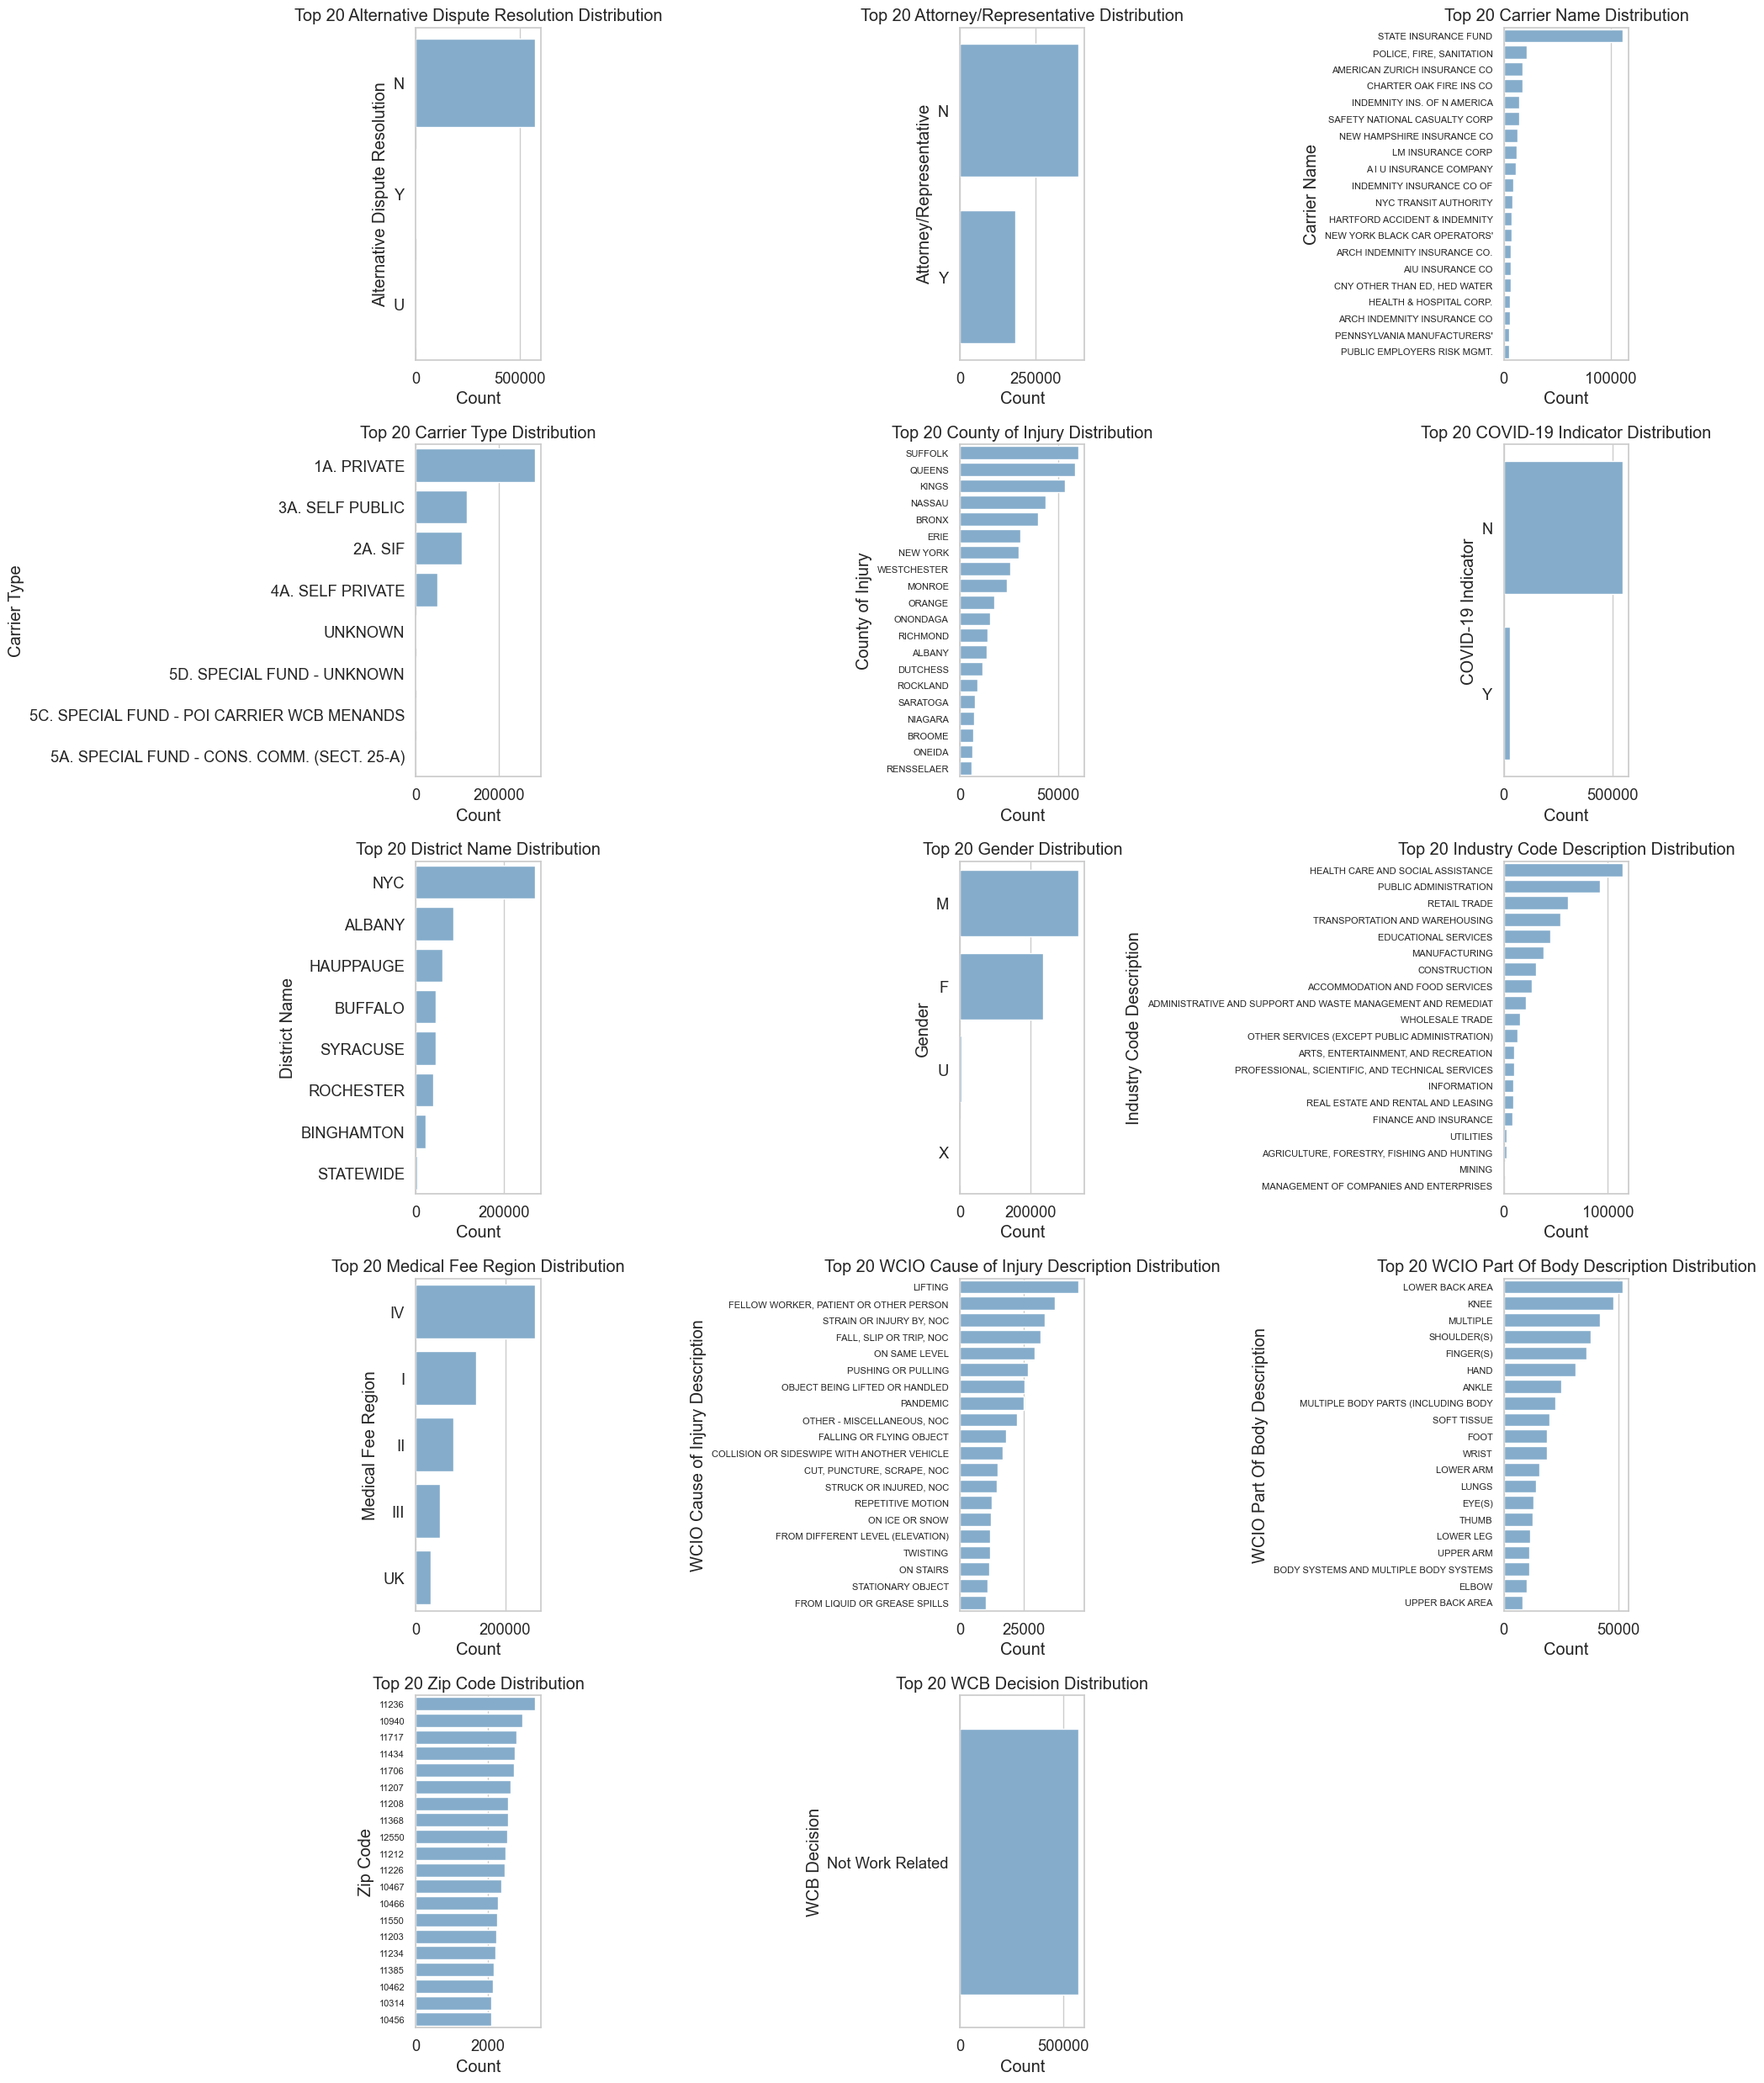

In [31]:
# Subset of categorical columns , so that we don't have dates and other features that cannot be visualized in a countplot 
subset_categorical = train_df_temp[['Alternative Dispute Resolution',
       'Attorney/Representative', 'Carrier Name',
       'Carrier Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'Gender',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Description',
       'WCIO Part Of Body Description', 'Zip Code', 'WCB Decision']].select_dtypes(include=[object])

# Calculate number of rows needed (3 plots per row)
n_vars = len(subset_categorical.columns)
n_rows = (n_vars // 3) + (1 if n_vars % 3 != 0 else 0)

# Create figure
plt.figure(figsize=(20, 5 * n_rows))

# Create countplot for each variable, limiting to top 20 categories where applicable
for i, col in enumerate(subset_categorical.columns, 1):
    top_20 = train_df_temp[col].value_counts().head(20).index
    filtered_data = train_df_temp[train_df_temp[col].isin(top_20)]
    
    plt.subplot(n_rows, 3, i)
    sns.countplot(data=filtered_data, y=col, order=top_20,color="#7aaed6")
    plt.title(f'Top 20 {col} Distribution')
    plt.xlabel('Count')
    
    # Adjust tick labels if too long
    if train_df_temp[col].nunique() > 10:
        plt.tick_params(axis='y', labelsize=8)

# Adjust layout
plt.tight_layout()
plt.show()



1. **Alternative Dispute Resolution & Attorney/Representative**:
   - The vast majority of cases do not involve alternative dispute resolution or attorney representation, indicating that most claims may be handled without these aspects.

2. **Carrier Name & Carrier Type**:
   - A small subset of carrier names appears frequently, suggesting a concentration of claims among a few key carriers. The distribution of carrier types is dominated by 'Private' and 'Self-Public' types, with a significant number of claims from the 'SF' and 'Unknown' types as well.

3. **County of Injury**:
   - Injuries are spread across many counties, but a few counties, like Suffolk and Nassau, have significantly higher counts, indicating regional concentrations of claims.

4. **COVID-19 Indicator**:
   - Most claims do not have a COVID-19 indicator, suggesting that COVID-19-related claims are less frequent in the dataset.

5. **District Name**:
   - The majority of claims are handled in the NYC district, with other districts like Albany and Hauppauge also showing notable counts.

6. **Gender**:
   - There is a higher count of male claimants compared to female claimants, with some cases marked as 'Unknown' or 'X'.

7. **Industry Code Description**:
   - The top industries involved in claims include health care, public administration, and construction, highlighting these sectors as more prone to work-related injuries.

8. **Medical Fee Region**:
   - Most cases fall under a few primary medical fee regions, with 'IV' and 'UK' being notably common.

9. **WCIO Cause of Injury Description**:
   - Lifting, falling, and repetitive motion are among the most common causes of injury, indicating typical work-related injuries.

10. **WCIO Part of Body Description**:
    - Injuries commonly involve the lower back, knees, and multiple parts, suggesting frequent musculoskeletal issues.

11. **Zip Code**:
    - The top 20 zip codes indicate that certain areas contribute more significantly to the dataset, possibly correlating with high population or working places areas.

12. **WCB Decision**:
    - The decision distribution shows that the majority of cases are categorized as 'Not Work Related,' which could imply a high rate of non-compensable claims or initial rejections.

### 2.3 __Data Codes to Descriptions__ Analysis <a id='data_codes'></a>
[to the top](#top)

__Code and Description Variables__

For the Industry Code & Industry Code Description variables, as well as for the WCIO variables, we want to check their relationship.

In [32]:
def analyze_code_description_relationship(data, code_column, description_column):
    # Step 1: Count unique descriptions per code
    code_to_description = data.groupby(code_column)[description_column].nunique()
    # Check if each code maps to a single unique description
    if code_to_description.max() == 1:
        print(f"\nEach {code_column} has only one unique {description_column}.")
    else:
        print(f"\nSome {code_column}s have multiple {description_column}s associated with them.")

    # Step 2: Count unique codes per description
    description_to_code = data.groupby(description_column)[code_column].nunique()
    # Check if each description maps to a single unique code
    if description_to_code.max() == 1:
        print(f"\nEach {description_column} has only one unique {code_column}.")
    else:
        print(f"\nSome {description_column}s have multiple {code_column}s associated with them.")

    # Step 3: Validate if there is a 1:1 relationship
    is_one_to_one = (code_to_description.max() == 1) and (description_to_code.max() == 1)
    if is_one_to_one:
        print(f"\n{code_column} and {description_column} have a 1:1 relationship.")
    else:
        print(f"\nThere is no 1:1 relationship between {code_column} and {description_column}.")

    # Step 4: Find descriptions with multiple unique associated codes
    description_to_unique_codes = data.groupby(description_column)[code_column].apply(lambda x: list(set(x)))
    descriptions_with_multiple_unique_codes = description_to_unique_codes[description_to_unique_codes.apply(len) > 1]
    
    print(f"\nDescriptions with multiple unique associated {code_column}s:")
    print(descriptions_with_multiple_unique_codes)

__Industry Code / Industry Code Description__

In [33]:
analyze_code_description_relationship(train_df_temp, 'Industry Code', 'Industry Code Description')


Each Industry Code has only one unique Industry Code Description.

Some Industry Code Descriptions have multiple Industry Codes associated with them.

There is no 1:1 relationship between Industry Code and Industry Code Description.

Descriptions with multiple unique associated Industry Codes:
Industry Code Description
MANUFACTURING                     [32.0, 33.0, 31.0]
RETAIL TRADE                            [44.0, 45.0]
TRANSPORTATION AND WAREHOUSING          [48.0, 49.0]
Name: Industry Code, dtype: object


* MANUFCTURING is associated with codes: 32, 33 and 31 

* RETRAIL TRADE is associated with codes: 44 and 45 

* TRANSPORTATION AND WAREHOUSING with codes: 48 and 49

For each __Industry Code__, the first check shows that each code corresponds to only one unique description. This indicates that every industry code maps to a single description.

Since each Industry Code uniquely maps to one Industry Code Description, we can delete the Industry Code and only keep its corresponding description. We will keep the description variable because we have more information within it that we will use for binning / mapping later. Since we have almost the same withformation in both variables, we don't need to keep both since it would distort the data for the models.

__WCIO Cause of Injury Code / WCIO Cause of Injury Description__

In [34]:
analyze_code_description_relationship(train_df_temp, 'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description')


Each WCIO Cause of Injury Code has only one unique WCIO Cause of Injury Description.

Some WCIO Cause of Injury Descriptions have multiple WCIO Cause of Injury Codes associated with them.

There is no 1:1 relationship between WCIO Cause of Injury Code and WCIO Cause of Injury Description.

Descriptions with multiple unique associated WCIO Cause of Injury Codes:
WCIO Cause of Injury Description
OBJECT BEING LIFTED OR HANDLED    [17.0, 66.0, 79.0]
REPETITIVE MOTION                       [97.0, 94.0]
Name: WCIO Cause of Injury Code, dtype: object


* OBJECT BEING LIFTED OR HANDLED  is associated with codes: 17, 66 and 79 

* REPETITIVE MOTION is associated with codes: 97 and 94 

For __WCIO Cause of Injury Code / Description__ it is the same as for __Industry Code / Description__. It shows that each code corresponds to only one unique description. This indicates that every code maps to a single description. However, some __WCIO Cause of Injury Descriptions__ map to more than one WCIO Cause of Injury Code. We will also just keep the __WCIO Cause of Injury Description.__

__WCIO Nature of Injury Code / WCIO Nature of Injury Description__

In [35]:
analyze_code_description_relationship(train_df_temp, 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description')


Each WCIO Nature of Injury Code has only one unique WCIO Nature of Injury Description.

Each WCIO Nature of Injury Description has only one unique WCIO Nature of Injury Code.

WCIO Nature of Injury Code and WCIO Nature of Injury Description have a 1:1 relationship.

Descriptions with multiple unique associated WCIO Nature of Injury Codes:
Series([], Name: WCIO Nature of Injury Code, dtype: object)


Since the Code and the Description have a 1:1 relationship, we will delete __WCIO Nature of Injury Code__. We decided to keep the description insted of the code to later map into groups. This can be done better with the descriptions than the code because we have more information in the descriptions.

__WCIO Part Of Body Code / WCIO Part Of Body Description__

In [36]:
analyze_code_description_relationship(train_df_temp, 'WCIO Part Of Body Code', 'WCIO Part Of Body Description')


Each WCIO Part Of Body Code has only one unique WCIO Part Of Body Description.

Some WCIO Part Of Body Descriptions have multiple WCIO Part Of Body Codes associated with them.

There is no 1:1 relationship between WCIO Part Of Body Code and WCIO Part Of Body Description.

Descriptions with multiple unique associated WCIO Part Of Body Codes:
WCIO Part Of Body Description
DISC           [43.0, 22.0]
SOFT TISSUE    [25.0, 18.0]
SPINAL CORD    [47.0, 23.0]
Name: WCIO Part Of Body Code, dtype: object


* DISC  is associated with codes: 43 and 22 

* SOFT TISSUE is associated with codes: 25 and 18

* SPINAL CORD is associated w/codes: 47 and 23

For __WCIO Part Of Body Code / Description__ it is the same as for __Industry Code / Description__ and __WCIO Cause of Injury Code / Description__. It shows that each code corresponds to only one unique description. We will also just keep the __WCIO Part Of Body Description__ for further mapping reasons.

### 2.4 __Multivariate Relationships <a id='data_codes'></a>
[to the top](#top)

__Impact of Gender on Injury Severity__

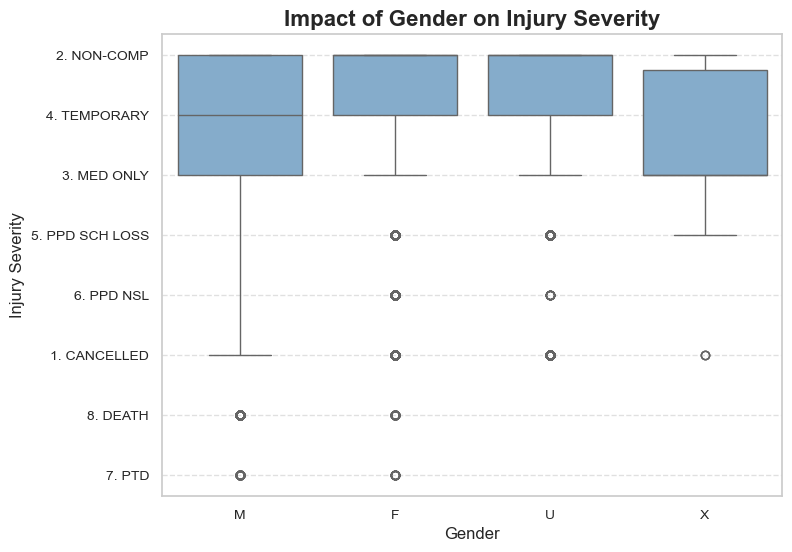

In [37]:
sns.set_palette("pastel")

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Claim Injury Type', data=train_df_temp, color='#7aaed6')
plt.title("Impact of Gender on Injury Severity", fontsize=16, weight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Injury Severity", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The most common outcomes appear to be less severe claims, clustered around __2 (Non-Comp), 3 (Medical Only), and 4 (Temporary)__.

While Males and Females show a similar range of injury severities, the __X category__ demonstrates much higher variability, indicating a broader spectrum of injury outcomes.
Females tend to show slightly less variability in injury outcomes compared to males.

Why is there greater variability in the __X group__? Are there specific circumstances (e.g., workplace conditions, job roles) that correlate with this higher range of severity?


__Distribution of Claims by Economic Sector__

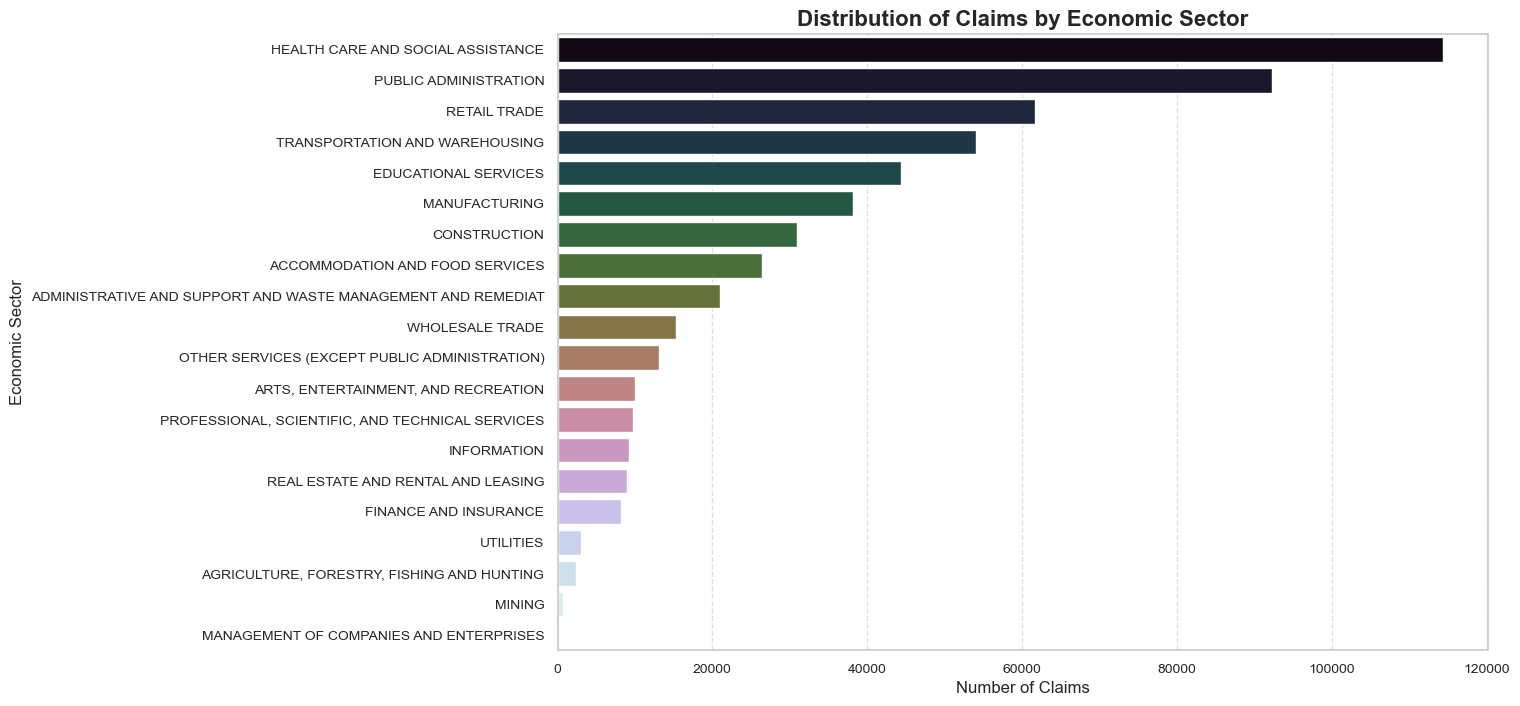

In [38]:
plt.figure(figsize=(12, 8))
industry_accidents = train_df_temp['Industry Code Description'].value_counts()

sns.barplot(y=industry_accidents.index, x=industry_accidents.values, palette="cubehelix")
plt.title("Distribution of Claims by Economic Sector", fontsize=16, weight='bold')
plt.xlabel("Number of Claims", fontsize=12)
plt.ylabel("Economic Sector", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

We can see that the sector with most claims is the __Health Care and Social Assistance__, indicating that an higher risk industry.

On the other hand, __Management of Companies and Enterprises__ have almost 0 (or 0, we should check) claims, suggesting they might be less hazardous, have fewer workers, or have fewer reported accidents

__Impact of COVID-19 on Injury Severity__

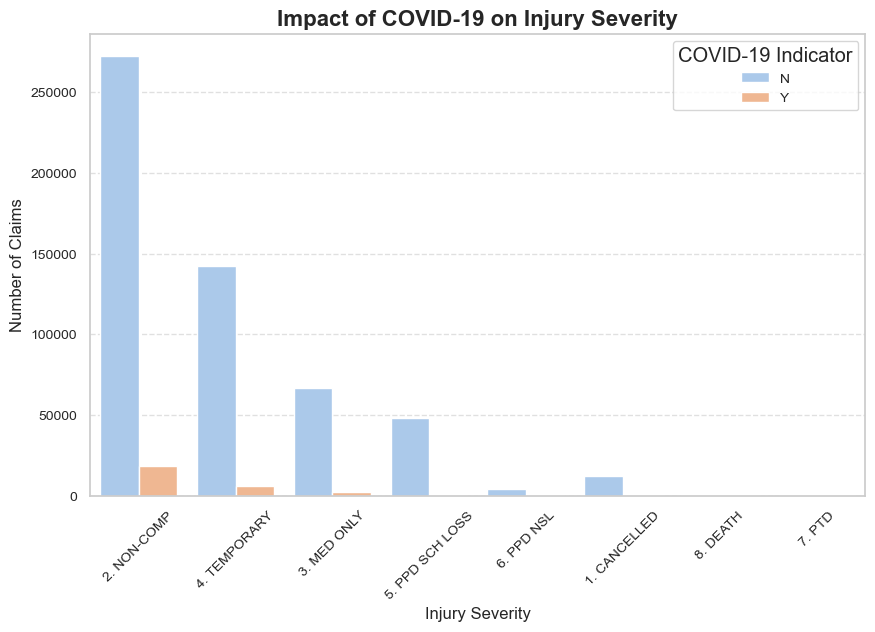

In [39]:
plt.figure(figsize=(10, 6))

sns.countplot(x='Claim Injury Type', hue='COVID-19 Indicator', data=train_df_temp)
plt.title("Impact of COVID-19 on Injury Severity", fontsize=16, weight='bold')
plt.xlabel("Injury Severity", fontsize=12)
plt.ylabel("Number of Claims", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotate the x-axis labels by 45 degrees
plt.yticks(fontsize=10)
plt.legend(title='COVID-19 Indicator', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

The majority of claims in this severity level were not influenced by the __COVID-19__ pandemic.

__COVID-19__ may have influenced some claims, it was not a major factor in most workers' compensation claims, especially for more severe injury types. The vast majority of claims are unrelated to the pandemic.